# DLIB
- Dlib, a C++ library, is a cross platform package for threading, networking, numerical operations, machine learning, computer vision and compression.
- Dlib has a number of state-of-the-art implementations on CV, which involve object detection and tracking.
***
## Training your own object detector
- grab the default training options for our HOG + Linear SVM detector, then initialize the
- list of images and bounding boxes used to train the classifier

In [1]:
from imutils import paths
from scipy.io import loadmat #annotations/bounding boxes in caltect is .mat which is matlab files
from skimage import io
import dlib
import sys
sys.path.append("../../")
from cv_imshow import display_image, create_subplot
import cv2
from matplotlib import pyplot as plt

In [2]:
args = {
    "class":"../../images/dlib/stop_sign_images/", #path to specific caltect class. This example, we use stop sign class
    "annotations":"../../images/dlib/stop_sign_annotations/", #bounding boxes of stop sign per image.
    "output":"../../images/dlib/output/stop_sign_detector.svm"
}

In [3]:
print("[INFO] gathering images and bounding boxes..")
#mostly paramters for HOG descriptor
options = dlib.simple_object_detector_training_options() 
images = []
boxes = []

for imagePath in paths.list_images(args["class"]):
    #extract image ID from the image path and load the annotations file
    imageID = imagePath[imagePath.rfind("/")+1:].split("_")[1]
    imageID = imageID.replace(".jpg","")
    p = "{}/annotation_{}.mat".format(args["annotations"], imageID)
    annotations = loadmat(p)["box_coord"]
    
    #loop over the annotations and add each annotation to list of bounding boxes.
    bb = [dlib.rectangle(left=int(x), top=int(y), right=int(w), bottom=int(h)) 
          for (y,h,x,w) in annotations]
    boxes.append(bb)
    
    #add image to list of images.
    images.append(io.imread(imagePath))

[INFO] gathering images and bounding boxes..


In [4]:
#train the object detector
detector = dlib.train_simple_object_detector(images, boxes, options)

#dump the classifier to file
print("[INFO] dumping classsifier to file")
detector.save(args["output"])

#visualize the results of the detector
win = dlib.image_window()
win.set_image(detector)
dlib.hit_enter_to_continue()

[INFO] dumping classsifier to file


***
## Testing Object Detector

In [5]:
args = {
    "detector":"../../images/dlib/output/stop_sign_detector.svm",
    "testing":"../../images/dlib/stop_sign_testing/"
}

In [6]:
detector = dlib.simple_object_detector(args["detector"])

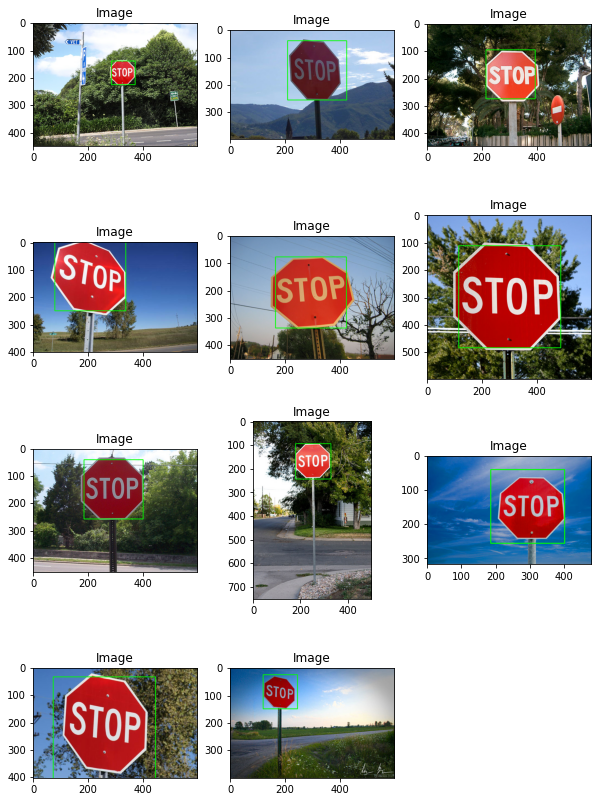

In [7]:
fig = plt.figure(figsize=(10,15))
rows = 4
columns = 3
#loop over testing images
for (i,testingPath) in enumerate(paths.list_images(args["testing"])):
    #load and make predictions
    image = cv2.imread(testingPath)
    boxes = detector(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    #loop over the bounding boxes and draw them
    for b in boxes:
        (x,y,w,h) = (b.left(),b.top(),b.right(), b.bottom())
        cv2.rectangle(image, (x,y), (w,h), (0,255,0), 2)
    
    create_subplot(fig, rows, columns, i+1, "Image", image)